In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('Black Friday Sale.csv')

# Data Cleaning and Preprocessing

In [114]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [116]:
df. isna(). sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [118]:
df.shape

(550068, 12)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [120]:
df.describe

<bound method NDFrame.describe of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0   

In [121]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [122]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',"4")
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [124]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [125]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [126]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [127]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [128]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [129]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [130]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [131]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [132]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

# Analysing the Data

In [134]:
gender_freq = df.Gender.value_counts()
gender_freq = pd.DataFrame({'Gender': gender_freq.index, 'Frequency': gender_freq.values})
gender_freq

,Gender,Frequency
0,M,414259
1,F,135809


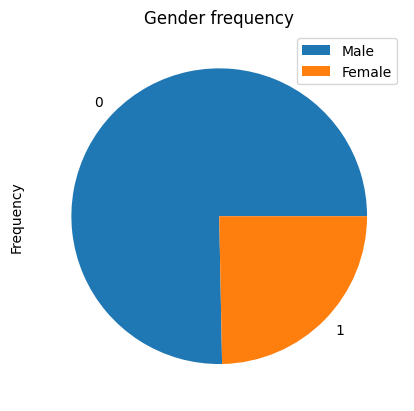

In [135]:
gender_freq.plot.pie(x='Gender',y='Frequency', rot=0)
plt.legend(["Male", "Female"])
plt.title("Gender frequency")
plt.savefig("gender_freq.png")

In [136]:
age_freq = df.Age.value_counts()
age_freq = pd.DataFrame({'Age': age_freq.index, 'Frequency': age_freq.values})
age_freq

,Age,Frequency
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


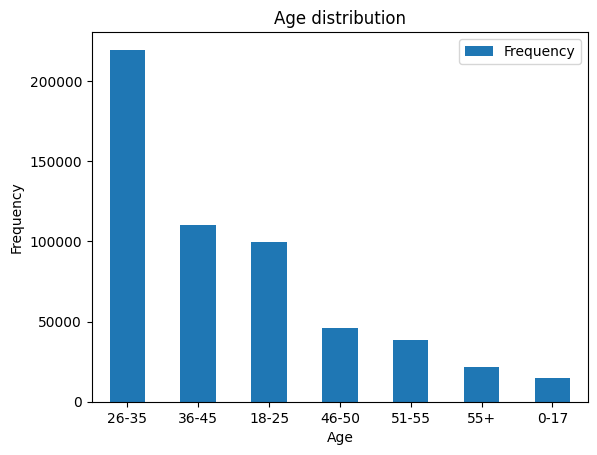

In [137]:
age_freq.plot.bar(x='Age',y='Frequency', rot=0)
# add x and y labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# show the plot
plt.savefig("age_distribution.png")

In [139]:
occupation_freq = df.Occupation.value_counts()
occupation_freq = pd.DataFrame({'Occupation': occupation_freq.index, 'Frequency': occupation_freq.values})
occupation_freq

,Occupation,Frequency
0,4,72308
1,0,69638
2,7,59133
3,1,47426
4,17,40043
5,20,33562
6,12,31179
7,14,27309
8,2,26588
9,16,25371


In [140]:
city_cat_freq = df.City_Category.value_counts()
city_cat_freq = pd.DataFrame({'City_Category': city_cat_freq.index, 'Frequency': city_cat_freq.values})
city_cat_freq

,City_Category,Frequency
0,B,231173
1,C,171175
2,A,147720


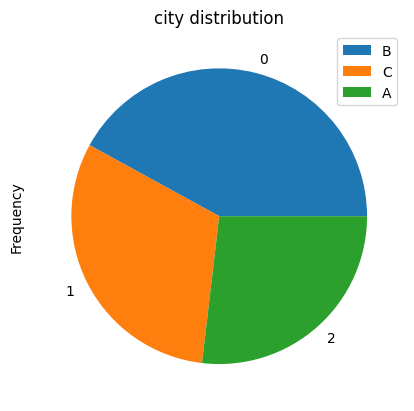

In [141]:
city_cat_freq.plot.pie(x='City_Category',y='Frequency', rot=0)
plt.legend(["B", "C","A"])
plt.title("city distribution")
plt.savefig("City distribution.png")

In [142]:
marital_status_freq = df.Marital_Status.value_counts()
marital_status_freq = pd.DataFrame({'Marital_Status': marital_status_freq.index, 'Frequency': marital_status_freq.values})
marital_status_freq

,Marital_Status,Frequency
0,0,324731
1,1,225337


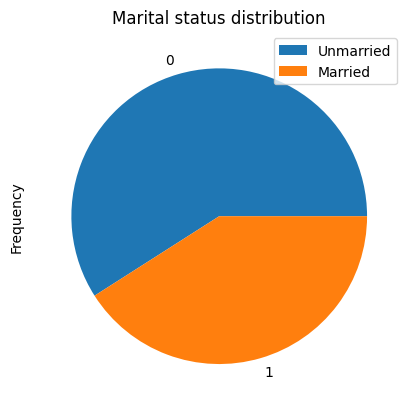

In [143]:
marital_status_freq.plot.pie(x='Marital_Status',y='Frequency', rot=0)
plt.legend(["Unmarried", "Married"])
plt.title("Marital status distribution")
plt.savefig("marital_status_freq.png")

In [144]:
product_cat_1_freq = df.Product_Category_1.value_counts()
product_cat_1_freq = pd.DataFrame({'Product_Category_1': product_cat_1_freq.index, 'Frequency': product_cat_1_freq.values})
product_cat_1_freq

,Product_Category_1,Frequency
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864
5,6,20466
6,3,20213
7,4,11753
8,16,9828
9,15,6290


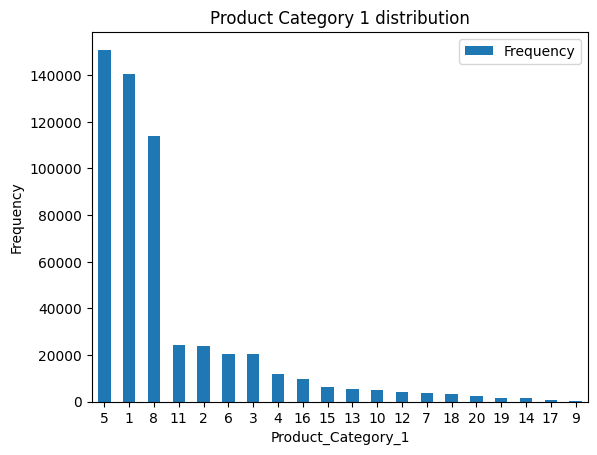

In [145]:
product_cat_1_freq.plot.bar(x='Product_Category_1',y='Frequency', rot=0)
# add x and y labels and a title
plt.xlabel('Product_Category_1')
plt.ylabel('Frequency')
plt.title('Product Category 1 distribution')

# show the plot
plt.show()

In [146]:
age_group_1 = df.groupby(['Product_Category_1', 'Age']).size()
age_group_1.to_excel('age_group_1.xlsx')

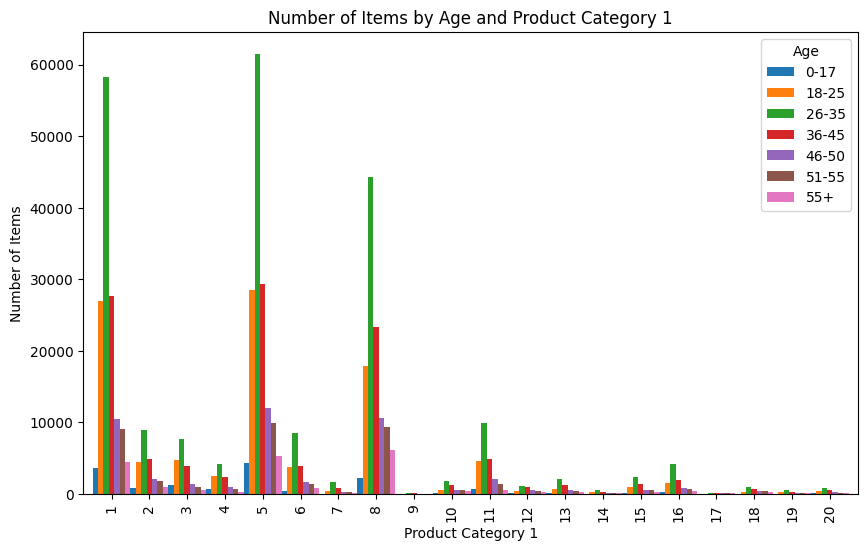

In [147]:
# pivot the DataFrame to create separate columns for each age group
pivoted = age_group_1.unstack()

# plot the pivoted DataFrame as a clustered bar chart
pivoted.plot(kind='bar', figsize=(10, 6),width=1)

# set the chart title and axis labels
plt.title('Number of Items by Age and Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Number of Items')

# show the chart
plt.savefig("age_group_1.png")

In [148]:
gender_group_1 = df.groupby(['Product_Category_1', 'Gender']).size()
gender_group_1.to_excel('gender_group_1.xlsx')

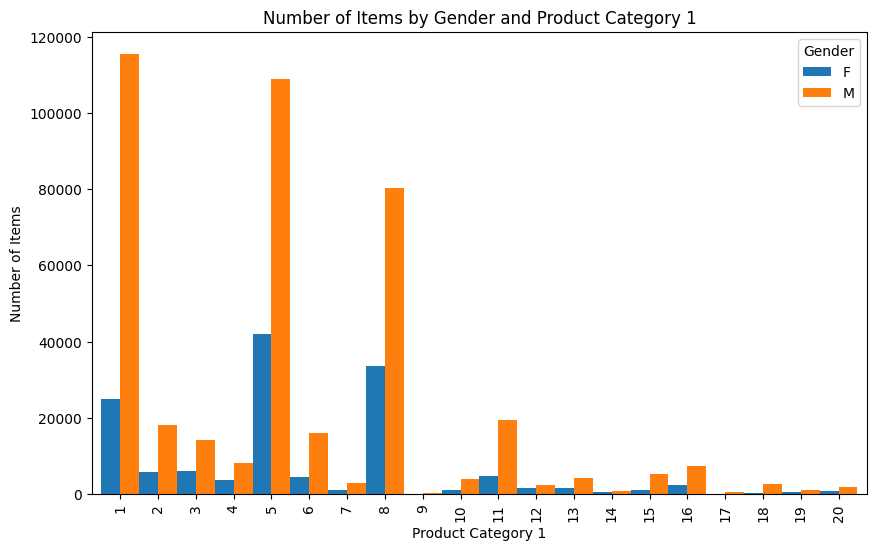

In [149]:
# pivot the DataFrame to create separate columns for each age group
pivoted = gender_group_1.unstack()

# plot the pivoted DataFrame as a clustered bar chart
pivoted.plot(kind='bar', figsize=(10, 6),width=1)

# set the chart title and axis labels
plt.title('Number of Items by Gender and Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Number of Items')

# show the chart
plt.savefig("gender_group_1.png")

In [150]:
marital_status_group_1 = df.groupby(['Product_Category_1', 'Marital_Status']).size()
marital_status_group_1.to_excel('marital_status_group_1.xlsx')

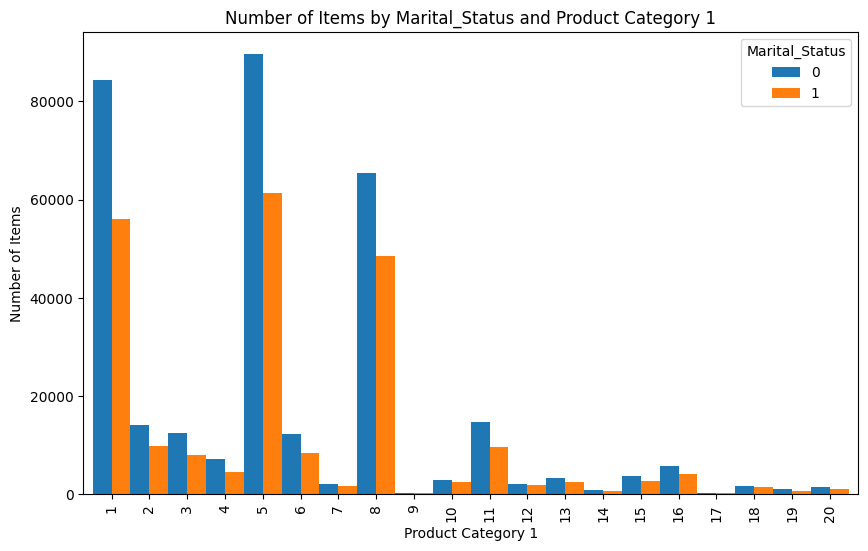

In [151]:
# pivot the DataFrame to create separate columns for each age group
pivoted = marital_status_group_1.unstack()

# plot the pivoted DataFrame as a clustered bar chart
pivoted.plot(kind='bar', figsize=(10, 6),width=1)

# set the chart title and axis labels
plt.title('Number of Items by Marital_Status and Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Number of Items')

# show the chart
plt.savefig("marital_status_group_1.png")

In [153]:
product_cat_2_freq = df.Product_Category_2.value_counts()
product_cat_2_freq = pd.DataFrame({'Product_Category_2': product_cat_2_freq.index, 'Frequency': product_cat_2_freq.values})
product_cat_2_freq

,Product_Category_2,Frequency
0,8.0,64088
1,14.0,55108
2,2.0,49217
3,16.0,43255
4,15.0,37855
5,5.0,26235
6,4.0,25677
7,6.0,16466
8,11.0,14134
9,17.0,13320


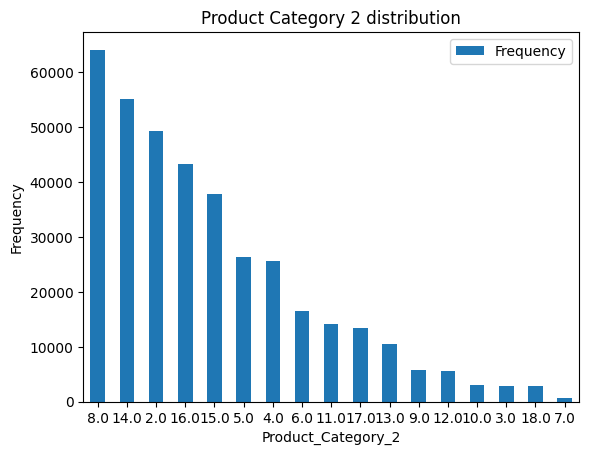

In [154]:
product_cat_2_freq.plot.bar(x='Product_Category_2',y='Frequency', rot=0)
# add x and y labels and a title
plt.xlabel('Product_Category_2')
plt.ylabel('Frequency')
plt.title('Product Category 2 distribution')

# show the plot
plt.show()

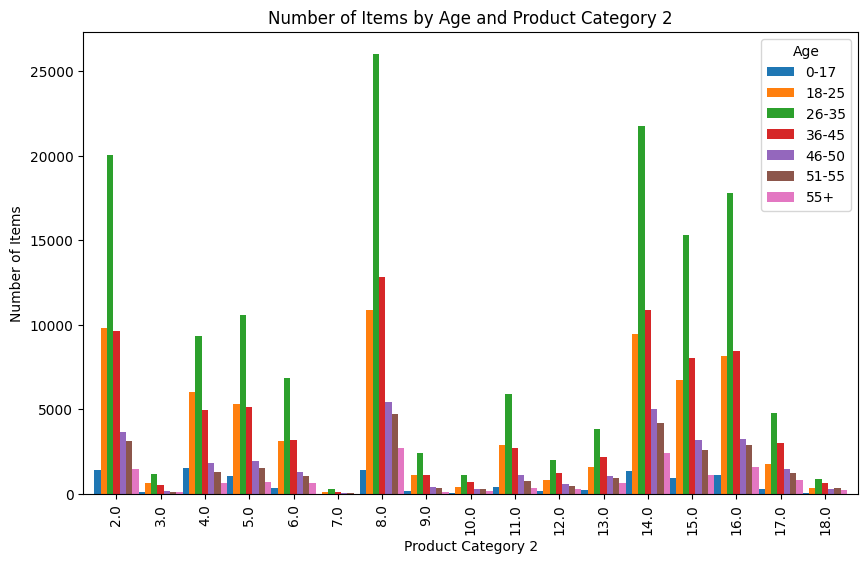

In [155]:
age_group_2 = df.groupby(['Product_Category_2', 'Age']).size()
age_group_2.to_excel('age_group_2.xlsx')

# pivot the DataFrame to create separate columns for each age group
pivoted = age_group_2.unstack()

# plot the pivoted DataFrame as a clustered bar chart
pivoted.plot(kind='bar', figsize=(10, 6),width=1)

# set the chart title and axis labels
plt.title('Number of Items by Age and Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Number of Items')

# show the chart
plt.savefig("age_group_2.png")

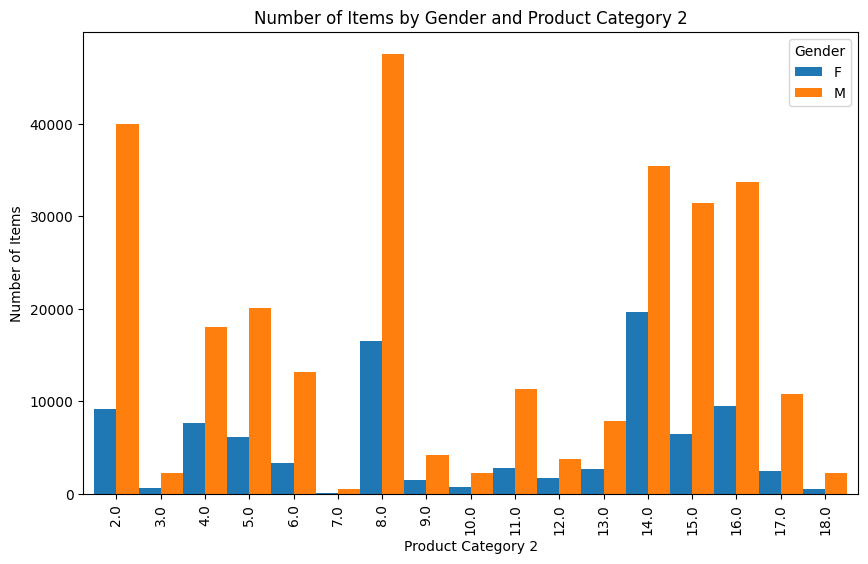

In [156]:
gender_group_2 = df.groupby(['Product_Category_2', 'Gender']).size()
gender_group_2.to_excel('gender_group_2.xlsx')

# pivot the DataFrame to create separate columns for each age group
pivoted = gender_group_2.unstack()

# plot the pivoted DataFrame as a clustered bar chart
pivoted.plot(kind='bar', figsize=(10, 6),width=1)

# set the chart title and axis labels
plt.title('Number of Items by Gender and Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Number of Items')

# show the chart
plt.savefig("gender_group_2.png")

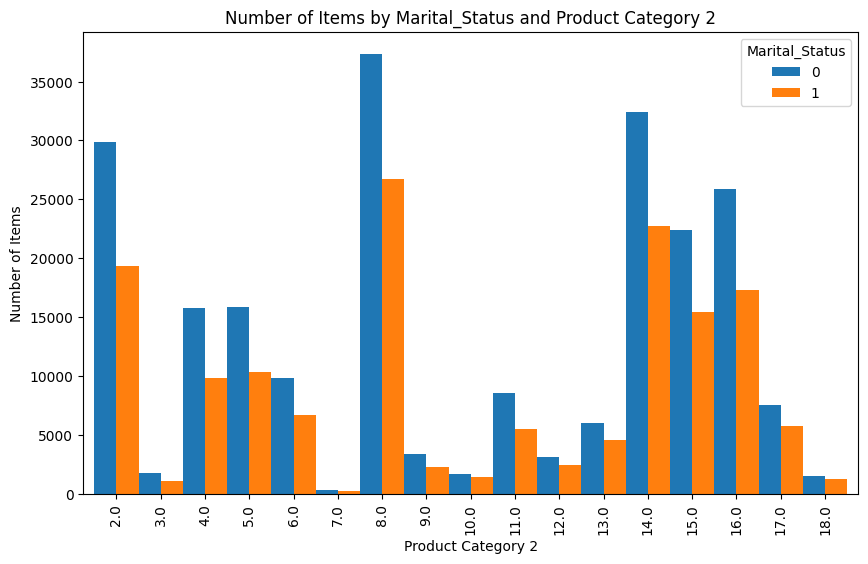

In [157]:
marital_status_group_2 = df.groupby(['Product_Category_2', 'Marital_Status']).size()
marital_status_group_2.to_excel('marital_status_group_2.xlsx')

# pivot the DataFrame to create separate columns for each age group
pivoted = marital_status_group_2.unstack()

# plot the pivoted DataFrame as a clustered bar chart
pivoted.plot(kind='bar', figsize=(10, 6),width=1)

# set the chart title and axis labels
plt.title('Number of Items by Marital_Status and Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Number of Items')

# show the chart
plt.savefig("marital_status_group_2.png")

In [158]:
product_cat_3_freq = df.Product_Category_3.value_counts()
product_cat_3_freq = pd.DataFrame({'Product_Category_3': product_cat_3_freq.index, 'Frequency': product_cat_3_freq.values})
product_cat_3_freq

,Product_Category_3,Frequency
0,16.0,32636
1,15.0,28013
2,14.0,18428
3,17.0,16702
4,5.0,16658
5,8.0,12562
6,9.0,11579
7,12.0,9246
8,13.0,5459
9,6.0,4890


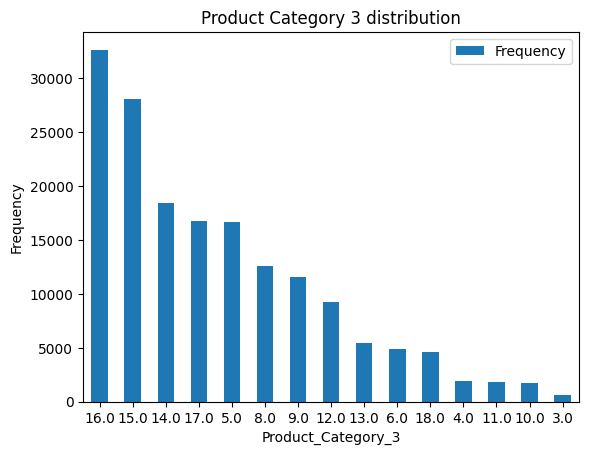

In [159]:
product_cat_3_freq.plot.bar(x='Product_Category_3',y='Frequency', rot=0)
# add x and y labels and a title
plt.xlabel('Product_Category_3')
plt.ylabel('Frequency')
plt.title('Product Category 3 distribution')

# show the plot
plt.show()

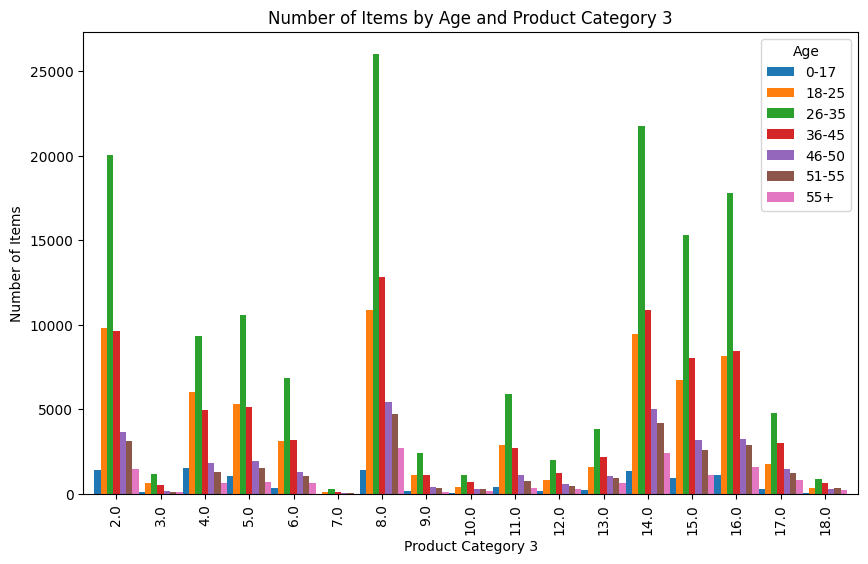

In [160]:
age_group_3 = df.groupby(['Product_Category_3', 'Age']).size()
age_group_3.to_excel('age_group_3.xlsx')

# pivot the DataFrame to create separate columns for each age group
pivoted = age_group_2.unstack()

# plot the pivoted DataFrame as a clustered bar chart
pivoted.plot(kind='bar', figsize=(10, 6),width=1)

# set the chart title and axis labels
plt.title('Number of Items by Age and Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Number of Items')

# show the chart
plt.savefig("age_group_3.png")

In [161]:
df.Stay_In_Current_City_Years.describe()

count    550068.000000
mean          1.858418
std           1.289443
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Stay_In_Current_City_Years, dtype: float64

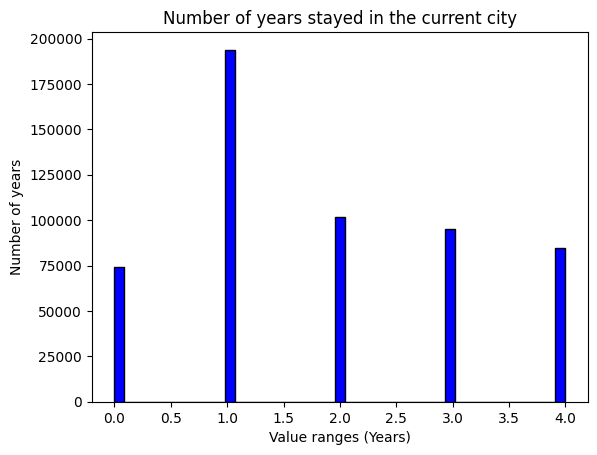

In [162]:
plt.hist(df['Stay_In_Current_City_Years'], color='blue', edgecolor='black', bins=45)
 
plt.xlabel('Value ranges (Years)')
plt.ylabel('Number of years')
plt.title('Number of years stayed in the current city')
plt.savefig("Stay_In_Current_City_Years_distribution.png")

In [163]:
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

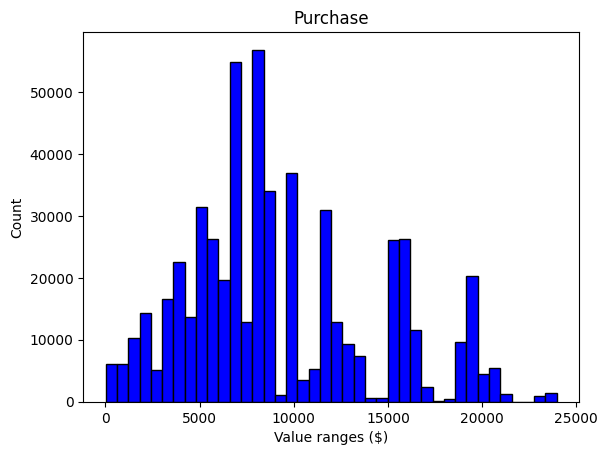

In [164]:
plt.hist(df['Purchase'], color='blue', edgecolor='black', bins=40)
 
plt.xlabel('Value ranges ($)')
plt.ylabel('Count')
plt.title('Purchase')
plt.savefig("purchase.png")

In [165]:
# calculate covariance matrix
covariance = np.cov(df['Purchase'], df['Stay_In_Current_City_Years'])
print(covariance)

[[2.52311860e+07 3.51199606e+01]
 [3.51199606e+01 1.66266210e+00]]


In [167]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(df['Purchase'], df['Stay_In_Current_City_Years'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.005


In [168]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, _ = spearmanr(df['Purchase'], df['Stay_In_Current_City_Years'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.006
